<a href="https://colab.research.google.com/github/mahmoudradwaan98/hello-world/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as mt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import datasets
from scipy.optimize import minimize 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
def loadDataset():
  dataset = datasets.load_wine()
  features = dataset.data
  labels = dataset.target
  return dataset, features[:,:2], labels

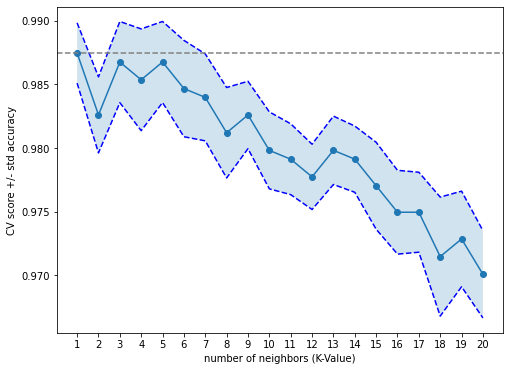

Test set score: 0.97
Final result of the model 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      0.97      0.99        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [ ]:
#KNN with 10-fold cross validation
X, y = datasets.load_digits(return_X_y=True)
X = X / X.max()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

n_neighbors = np.linspace(1, 20, 20, dtype=np.int32)
tuned_parameters = [{"n_neighbors": n_neighbors}]
knn = KNeighborsClassifier(n_neighbors=1)
n_folds = 10
clf = GridSearchCV(knn, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

plt.figure().set_size_inches(8, 6)
plt.plot(n_neighbors, scores, marker="o")
std_error = scores_std / np.sqrt(n_folds)
plt.plot(n_neighbors, scores + std_error, "b--")
plt.plot(n_neighbors, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(n_neighbors, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std accuracy")
plt.xlabel("number of neighbors (K-Value)")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xticks(n_neighbors)
plt.show()

cli = KNeighborsClassifier(n_neighbors=5)
cli.fit(X_train, y_train)
y_pred = cli.predict(X_test)
print("Test set score: {:.2f}".format(cli.score(X_test, y_test)))
print("Final result of the model \n {}".format(classification_report(y_test, y_pred)))

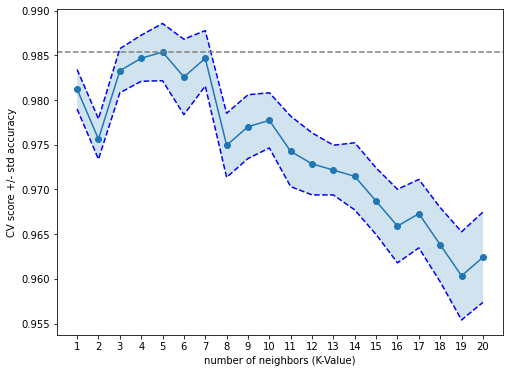

Test set score: 0.97
Final result of the model 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      0.97      0.99        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [ ]:
#KNN with 10-fold cross validation
X, y = datasets.load_digits(return_X_y=True)
X = X / X.max()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

n_neighbors = np.linspace(1, 20, 20, dtype=np.int32)
tuned_parameters = [{"n_neighbors": n_neighbors}]
knn = KNeighborsClassifier(n_neighbors=1, metric = "manhattan")
n_folds = 10
clf = GridSearchCV(knn, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

plt.figure().set_size_inches(8, 6)
plt.plot(n_neighbors, scores, marker="o")
std_error = scores_std / np.sqrt(n_folds)
plt.plot(n_neighbors, scores + std_error, "b--")
plt.plot(n_neighbors, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(n_neighbors, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std accuracy")
plt.xlabel("number of neighbors (K-Value)")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xticks(n_neighbors)
plt.show()

cli = KNeighborsClassifier(n_neighbors=5)
cli.fit(X_train, y_train)
y_pred = cli.predict(X_test)
print("Test set score: {:.2f}".format(cli.score(X_test, y_test)))
print("Final result of the model \n {}".format(classification_report(y_test, y_pred)))

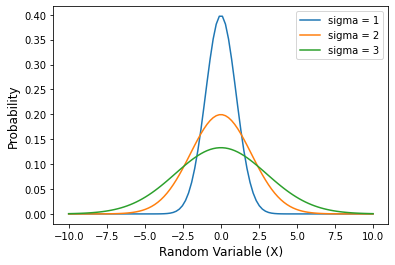

In [ ]:
# mu = Mean
# Sigma = Standart Deviation
mu_1, mu_2, mu_3 = 0, 0, 0
sigma_1, sigma_2, sigma_3 = 1, 2, 3

x = np.linspace(-10, 10, 100)

fd1 = norm.pdf(x, mu_1, sigma_1)
fd2 = norm.pdf(x, mu_2, sigma_2)
fd3 = norm.pdf(x, mu_3, sigma_3)

plt.plot(x, fd1, label= 'sigma = 1')
plt.plot(x, fd2, label= 'sigma = 2')
plt.plot(x, fd3, label= 'sigma = 3')
plt.xlabel('Random Variable (X)', fontsize='12')
plt.ylabel('Probability', fontsize='12')
plt.legend()
plt.show()

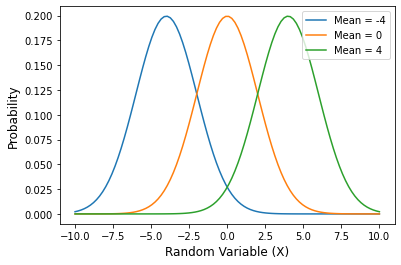

In [ ]:
mu_1, mu_2, mu_3 = -4, 0, 4
sigma_1, sigma_2, sigma_3 = 2, 2, 2

x = np.linspace(-10, 10, 100)

fd1 = norm.pdf(x, mu_1, sigma_1)
fd2 = norm.pdf(x, mu_2, sigma_2)
fd3 = norm.pdf(x, mu_3, sigma_3)

plt.plot(x, fd1, label='Mean = -4')
plt.plot(x, fd2, label='Mean = 0')
plt.plot(x, fd3, label='Mean = 4')
plt.xlabel('Random Variable (X)', fontsize='12')
plt.ylabel('Probability', fontsize='12')
plt.legend()
plt.show()

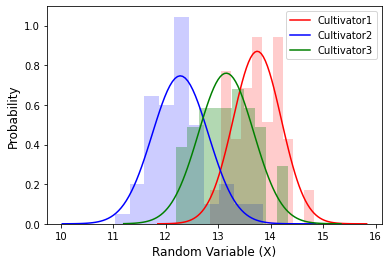

In [ ]:
iris, features, labels = loadDataset()

feat1 = features[labels==0,0]
feat2 = features[labels==1,0]
feat3 = features[labels==2,0]

mean1, sdt1  = norm.fit(feat1)
mean2, sdt2 =  norm.fit(feat2)
mean3, sdt3 =  norm.fit(feat3)

x1 = np.linspace(feat1.min() -1, feat1.max() + 1, 100) 
x2 = np.linspace(feat2.min() -1, feat2.max() + 1, 100)
x3 = np.linspace(feat3.min() -1, feat3.max() + 1, 100)

fitted_data1 = norm.pdf(x1, mean1, sdt1)
fitted_data2 = norm.pdf(x2, mean2, sdt2)
fitted_data3 = norm.pdf(x3, mean3, sdt3)

plt.plot(x1,fitted_data1,'r-', label='Cultivator1')
plt.hist(feat1, density=True, color="red", alpha=0.2)

plt.plot(x2,fitted_data2,'b-', label='Cultivator2')
plt.hist(feat2, density=True, color="blue", alpha=0.2)

plt.plot(x3,fitted_data3,'g-', label='Cultivator3')
plt.hist(feat3, density=True, color="green", alpha=0.3)

plt.legend()
plt.xlabel('Random Variable (X)', fontsize='12')
plt.ylabel('Probability', fontsize='12')
plt.show()

Mean1: 13.744745762711865, Var1: 0.20994018960068953
Mean2: 12.278732394366195, Var2: 0.28532937909145006
Mean3: 13.153750000000002, Var3: 0.2752984375000001


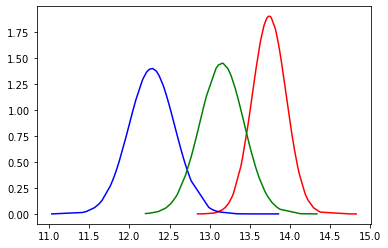

In [ ]:
var1= sdt1**2 #np.var(feat1)
var2= sdt2**2 #np.var(feat2)
var3= sdt3**2 #np.var(feat3)

li_cul1 = []
feat1.sort()
for i in feat1:
  num = (1/(mt.sqrt(2*mt.pi)*var1))
  num2 = -1 * pow((i - mean1),2)
  den2 = 2*pow(var1,2)
  point = num * mt.exp(num2/den2)
  li_cul1.append(point)

li_cul2 = []
feat2.sort()
for j in feat2:
  num = (1/(mt.sqrt(2*mt.pi)*var2))
  num2 = -1 * pow((j - mean2),2)
  den2 = 2*pow(var2,2)
  point = num * mt.exp(num2/den2)
  li_cul2.append(point)

li_cul3 = []
feat3.sort()
for k in feat3:
  num = (1/(mt.sqrt(2*mt.pi)*var3))
  num2 = -1 * pow((k - mean3),2)
  den2 = 2*pow(var3,2)
  point = num * mt.exp(num2/den2)
  li_cul3.append(point)

print(f"Mean1: {mean1}, Var1: {var1}")
print(f"Mean2: {mean2}, Var2: {var2}")
print(f"Mean3: {mean3}, Var3: {var3}")

plt.close('all')
plt.plot(feat1, li_cul1,'r-', label='Cultivator1')
plt.plot(feat2, li_cul2,'b-', label='Cultivator2')
plt.plot(feat3, li_cul3,'g-', label='Cultivator3')

In [ ]:
# Random Variable
x = np.linspace(-20, 20, 100)

# Normally distributed residuals
e = np.random.normal(3, 5, 100)

# generate ground truth
y = 4*x + e

df = pd.DataFrame({'constant':1, 'x':x, 'y':y})
df.head()

,constant,x,y
0,1,-20.000000,-80.257392
1,1,-19.595960,-66.433543
2,1,-19.191919,-84.528227
3,1,-18.787879,-73.928694
4,1,-18.383838,-74.182428


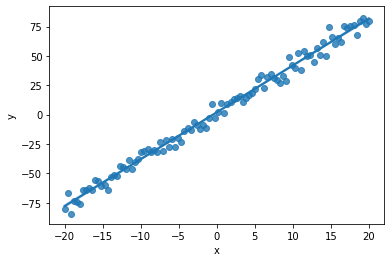

In [ ]:
sns.regplot(x='x', y='y', data = df)
plt.show()

In [ ]:
X = df[['constant', 'x']]

reg = LinearRegression().fit(X, y)
print("score:", reg.score(X, y))
print("coef:", reg.coef_)
print("intercept:", reg.intercept_)

score: 0.9894035687318509
coef: [0.         3.99274755]
intercept: 1.9435670884333098


In [ ]:
def MLE_est(param):
  intercept, coef, std_dev = param
  # prediction
  yhat = coef * x + intercept
  # log-likelihood
  LL = np.sum(norm.logpdf(y, yhat, std_dev))
  # negative log-likelihood
  neg_LL = -1 * LL
  return neg_LL

In [ ]:
# minimize arguments: function, intial_guess_of_parameters, method
MLE_model = minimize(MLE_est, np.array([3,3,3]), method='L-BFGS-B')
MLE_model

      fun: 299.1552081783206
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.13686838e-05, 3.18323146e-04, 5.68434189e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 68
      nit: 16
   status: 0
  success: True
        x: array([1.9435694 , 3.99274809, 4.81922803])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

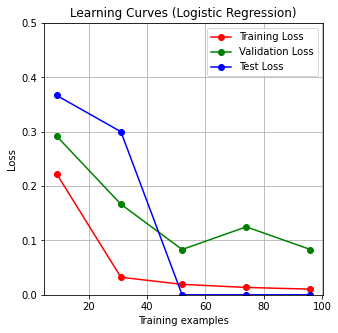

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, axes=None, ylim=None, train_sizes=np.linspace(0.1, 1.0, 5),):
    axes = plt.figure(figsize=(5, 5)).gca()
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Loss")
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    train_loss_list = []
    val_loss_list = []
    test_loss_list = []
    length_list = []
    X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=0)

    for i in [0.1, 0.325, 0.55, 0.775, 1]:
      length = int(X_t.shape[0] * i )
      length_list.append(length)
      X_tmp = X_t[:length]
      y_tmp = y_t[:length]
      estimator.fit(X_tmp, y_tmp)
      train_loss = 1 - estimator.score(X_tmp, y_tmp)
      train_loss_list.append(train_loss)
      val_loss = 1 - estimator.score(X_val, y_val)
      val_loss_list.append(val_loss)
      test_loss = 1 - estimator.score(X_test, y_test)
      test_loss_list.append(test_loss)

    # Plot learning curve
    axes.grid()
    axes.plot(
        length_list, train_loss_list, "o-", color="r", label="Training Loss"
    )
    axes.plot(
        length_list, val_loss_list, "o-", color="g", label="Validation Loss"
    )
    axes.plot(
        length_list, test_loss_list, "o-", color="b", label="Test Loss"
    )
    axes.legend(loc="best")

    return plt

title = "Learning Curves (Logistic Regression)"
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(
    estimator, title, X_train, y_train, X_test, y_test,  ylim=(0.0, 0.5),)